# Olympics Data Analysis (1896 - 2016)

**About**: The dataset has been taken from Kaggle and provides information on the Olympic Games, including all the Games from Athens 1896 to Rio 2016. Here, we will be analysing both Winter and Summer Olympicsand it is to be noted that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996 and so on.

Dataset link: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results 

Analysis will be done on:

a) Number of Medals won by each Country/ Region 

b) Country-wise analysis     
i) Based on performance in both Winter and Summer sports

c) Athlete-wise analysis    
    Top 10 best performing atheletes of all times  

d) Overall Analysis

### 1. Import libraries

In [1383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(color_codes = True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#import warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Import Dataframe

In [1384]:
df_region = pd.read_csv("noc_regions.csv")
df_main = pd.read_csv("athlete_events.csv")

In [1385]:
df_main.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [1386]:
df_main.shape

(271116, 15)

In [1387]:
df_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [1388]:
df_region.shape

(230, 3)

In [1389]:
df_merge = df_main.merge(df_region,on= "NOC", how="left")

In [1390]:
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### 3. Data Cleaning

1. Understanding the data and identifying the data types
2. Checking for Missing/ Duplicate values and categorizing data columns
3. Imputing/ Removing missing values
4. Handling outlier (if any)
5. Standardizing values(units, precision, format, pre/suf-fixes)
6. Fixing any invalid values(if any) and filtering data

In [1391]:
df_merge.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [1392]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


All datatypes seem to be correct except "Age" can be in int instead of float 

In [1393]:
df_merge["Age"] = pd.to_numeric(df_merge["Age"], errors='coerce', downcast='integer')

In [1394]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


Conversion is not taking place due to missing values in "Age" column

In [1395]:
#Lets check for all missing values first

df_merge.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [1396]:
# replace NaN values with mode
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].mode()[0])

In [1397]:
df_merge["Age"]= df_merge["Age"].astype("int64")

In [1398]:
df_merge["Age"].dtype

dtype('int64')

In [1399]:
# "Region" shows 370 missing values. Since "NOC" column corresponds to "region" column. we can continue our analysis using "NOC"
df_merge["region"].nunique()

205

In [1400]:
df_merge["NOC"].nunique()

230

In [1401]:
df_merge["Medal"].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

Missing values in Columns "Height" and "Weight" can be left as is

In [1402]:
df_merge["notes"]= df_merge["notes"].fillna("Missing")

In [1403]:
df_merge.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes          0
dtype: int64

In [1404]:
# Checking for Duplicates
df_merge.duplicated().sum()

1385

In [1405]:
df_merge.drop_duplicates(inplace=True)

In [1406]:
df_merge.duplicated().sum()

0

In [1407]:
# Check for outliers
df_merge.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,269731.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.370002,175.338953,70.701778,1978.623073
std,39026.253843,6.073065,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Age 
 count    269731.000000
mean         25.370002
std           6.073065
min          10.000000
25%          22.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


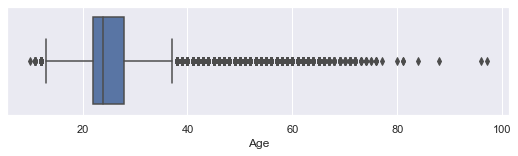

Height 
 count    210917.000000
mean        175.338953
std          10.518507
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64


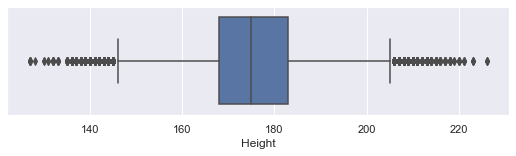

Weight 
 count    208204.000000
mean         70.701778
std          14.349027
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64


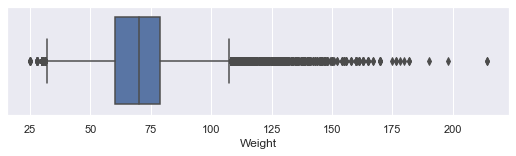

In [1408]:

cont_cols = ["Age","Height", "Weight"]

for i in cont_cols:
    plt.figure(figsize= (9,2))
    sns.boxplot(df_merge[i])
    print(i,"\n",df_merge[i].describe())
    plt.show()

In [1409]:
df_merge[df_merge["Age"] == df_merge["Age"].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
257054,128719,John Quincy Adams Ward,M,97,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,Missing


In [1410]:
df_merge[df_merge["Age"] == df_merge["Age"].min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
142882,71691,Dimitrios Loundras,M,10,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,Missing


There are no outliers as these are all actual data

In [1411]:
df_merge[df_merge["region"].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
578,332,Zarinah Abdullah,F,21,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,Missing
579,332,Zarinah Abdullah,F,25,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,Missing
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,Missing
6267,3515,Paulo Amotun Lokoro,M,24,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team
7659,4264,Ang Peng Siong,M,21,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26,182.0,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN,NaN,Missing
268753,134454,Zhang Guirong,F,30,182.0,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,NaN,Missing
268993,134587,Zhang Xueling,F,21,163.0,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,NaN,Missing
268994,134587,Zhang Xueling,F,21,163.0,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN,NaN,Missing


In [1412]:
df_merge["region"] = df_merge.apply(lambda x: x["Team"] if pd.isna(x["region"]) else x["region"], axis=1)

In [1413]:
df_merge.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region         0
notes          0
dtype: int64

In [1414]:
df_merge["Medal"].value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [1415]:
medal_catg = pd.get_dummies(df_merge["Medal"])
medal_catg

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
271111,0,0,0
271112,0,0,0
271113,0,0,0
271114,0,0,0


In [1416]:
# We want to concatonate the "medal_catg" dataframe with our main dataframe "df_merge"
df_merge = pd.concat([df_merge,medal_catg], axis=1)

In [1417]:
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,Missing,0,0,0
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,Missing,0,0,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Missing,0,0,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,Missing,0,1,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Missing,0,0,0


### 4. Exploratory Data Analysis

#### (i) Medal tally done Year-wise and Country-wise for both Summer and Winter Olympics  

In [1418]:
# Medal tally based on Winter and summer games for all countires

medal_tally = df_merge.groupby(["Season","region"]).sum()[["Gold", "Silver", "Bronze"]]
medal_tally

Gold  Silver  Bronze
Season region                                       
Summer Afghanistan               0.0     0.0     2.0
       Albania                   0.0     0.0     0.0
       Algeria                   5.0     4.0     8.0
       American Samoa            0.0     0.0     0.0
       Andorra                   0.0     0.0     0.0
...                              ...     ...     ...
Winter Uzbekistan                1.0     0.0     0.0
       Venezuela                 0.0     0.0     0.0
       Virgin Islands, British   0.0     0.0     0.0
       Virgin Islands, US        0.0     0.0     0.0
       Zimbabwe                  0.0     0.0     0.0

[324 rows x 3 columns]

In [1419]:
summer_medal_tally = medal_tally.loc["Summer"].sort_values("Gold", ascending = False).reset_index()
winter_medal_tally = medal_tally.loc["Winter"].sort_values("Gold", ascending = False).reset_index()
print("Showing Medals received by each Country during Summer Olympics:\n", summer_medal_tally.head())
print("\n\nShowing Medals received by each Country during Winter Olympics:\n", winter_medal_tally.head())

Showing Medals received by each Country during Summer Olympics:
     region    Gold  Silver  Bronze
0      USA  2472.0  1333.0  1197.0
1   Russia  1220.0   974.0   994.0
2  Germany  1075.0   987.0  1064.0
3       UK   635.0   729.0   620.0
4    Italy   518.0   474.0   454.0


Showing Medals received by each Country during Winter Olympics:
     region   Gold  Silver  Bronze
0   Russia  379.0   196.0   184.0
1   Canada  305.0   199.0   107.0
2  Germany  226.0   208.0   196.0
3      USA  166.0   308.0   161.0
4   Norway  151.0   165.0   127.0


In [1420]:
# lets check Indias performance 
print(summer_medal_tally[summer_medal_tally["region"] == "India"])
print(winter_medal_tally[winter_medal_tally["region"] == "India"])


   region   Gold  Silver  Bronze
20  India  131.0    19.0    40.0
   region  Gold  Silver  Bronze
17  India   7.0     0.0     0.0


As per the Olympics information India has won only 10 gold medals in Summer olympics and none in winter olympics. So we need to check and filter the data.

In [1421]:
df_merge[(df_merge["region"]== "India") & (df_merge["Gold"]==1)].sort_values(by="Year").head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
218235,109611,Antarge Sherpa,M,23,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,Missing,0,1,0
218244,109618,Temba Sherpa,M,23,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,Missing,0,1,0
218243,109617,Sange Sherpa,M,23,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,Missing,0,1,0
218242,109616,Pembra Sherpa,M,23,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,Missing,0,1,0
218241,109615,Pasang Sherpa,M,23,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,Missing,0,1,0
218240,109614,Narbu Sherpa,M,23,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,Missing,0,1,0
218239,109613,Lhakpa Sherpa,M,23,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India,Missing,0,1,0
89524,45360,Leslie Charles Hammond,M,23,184.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,Missing,0,1,0
116859,59150,"Feroz-ud-Din ""Feroze"" Khan",M,23,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,Missing,0,1,0
150463,75490,George Eric McCarthy Marthins,M,22,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,Missing,0,1,0


In [1422]:
# Cross checking with original data
df_main[(df_main["NOC"]== "IND") & (df_main["Medal"]=="Gold")].sort_values(by="Year").head(25)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
218235,109611,Antarge Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218244,109618,Temba Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218243,109617,Sange Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218242,109616,Pembra Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218241,109615,Pasang Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218240,109614,Narbu Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
218239,109613,Lhakpa Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
89524,45360,Leslie Charles Hammond,M,23.0,184.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
116859,59150,"Feroz-ud-Din ""Feroze"" Khan",M,23.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
150463,75490,George Eric McCarthy Marthins,M,22.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold


Here we see that for the same year it shows India winning Gold 14 times and also incoorectly shows India winning at winter olymics

In [1423]:
#dropping incorrect information
df_merge = df_merge.drop(df_main[(df_main["NOC"]=="IND")*(df_merge["Season"]== "Winter") & (df_merge["Medal"]== "Gold")].index)

In [1424]:
# so will drop the duplicate columns having medals in the same event and year 
medal_tally = df_merge.drop_duplicates(subset=["Team", "NOC","Year","Season","Games", "City","Sport","Event","Medal"])
medal_tally.shape

(124633, 20)

In [1425]:
# Filter medal_tally DataFrame for Summer season
summer_medal_tally = medal_tally[medal_tally["Season"] == "Summer"]

# Group by "region" and sum up the medals, then sort by "Gold" in descending order
summer_medal_tally = summer_medal_tally.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()

print("Medals received by each Country during Summer Olympics:\n", summer_medal_tally)


Medals received by each Country during Summer Olympics:
                region    Gold  Silver  Bronze
0                 USA  1035.0   802.0   708.0
1              Russia   592.0   498.0   487.0
2             Germany   444.0   457.0   491.0
3                  UK   278.0   317.0   300.0
4              France   234.0   256.0   287.0
..                ...     ...     ...     ...
208  Marshall Islands     0.0     0.0     0.0
209             Malta     0.0     0.0     0.0
210              Mali     0.0     0.0     0.0
211          Maldives     0.0     0.0     0.0
212       Afghanistan     0.0     0.0     2.0

[213 rows x 4 columns]


In [1426]:
# Filter medal_tally DataFrame for Winter season
winter_medal_tally = medal_tally[medal_tally["Season"] == "Winter"]


winter_medal_tally = winter_medal_tally.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()

print("Medals received by each Country during Summer Olympics:\n", winter_medal_tally)

Medals received by each Country during Summer Olympics:
         region  Gold  Silver  Bronze
0      Germany   136     135     106
1       Russia   135     102     102
2       Norway   111     108     100
3          USA    96      99      84
4       Canada    62      56      52
..         ...   ...     ...     ...
106    Hungary     0       2       4
107   Honduras     0       0       0
108  Guatemala     0       0       0
109       Guam     0       0       0
110   Zimbabwe     0       0       0

[111 rows x 4 columns]


In [1427]:
print(summer_medal_tally[summer_medal_tally["region"] == "India"])
print(winter_medal_tally[winter_medal_tally["region"] == "India"])

   region  Gold  Silver  Bronze
45  India   9.0     7.0    12.0
    region  Gold  Silver  Bronze
104  India     0       0       0


In [1428]:
# Medal Tally Year-wise - Summer

summer_medal_df = medal_tally[medal_tally["Season"] == "Summer"]
years_s = summer_medal_df["Year"].unique().tolist()
years_s.sort()

In [1429]:
years_s.insert(0,"Overall")
years_s

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [1430]:
# Medal Tally Year-wise - Winter

winter_medal_df = medal_tally[medal_tally["Season"] == "Winter"]
years_w = winter_medal_df["Year"].unique().tolist()
years_w.sort()
years_w.insert(0,"Overall")
years_w

['Overall',
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1998,
 2002,
 2006,
 2010,
 2014]

In [1431]:
# Medal Tally Country-wise - Summer


country_s = summer_medal_df["region"].unique().tolist()
country_s.sort()
country_s

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [1432]:
# Medal Tally Country-wise - Winter

country_w = winter_medal_df["region"].unique().tolist()
country_w.sort()
country_w

['Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Boliva',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guam',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Individual Olympic Athletes',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Madagascar',
 'Malta',
 'Mexico',
 'Moldova',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'North Korea',
 'Norway',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Phi

In [1433]:
def fetch_summer_medal_df(summer_medal_df, years_s, country_s):
    flag = 0
    if years_s == "Overall" and country_s == "Overall":
        fetch_summer_df = summer_medal_df
    if years_s == "Overall" and country_s != "Overall":
        flag = 1
        fetch_summer_df = summer_medal_df[summer_medal_df["region"] == country_s]
    if years_s != "Overall" and country_s == "Overall":
        fetch_summer_df = summer_medal_df[summer_medal_df["Year"] == int(years_s)]
    if years_s != "Overall" and country_s != "Overall":
        fetch_summer_df = summer_medal_df[(summer_medal_df["region"] == country_s) & (summer_medal_df["Year"] == int(years_s))]
    
    if flag == 1:
        df_summer = fetch_summer_df.groupby("Year").sum()[["Gold","Silver", "Bronze"]].sort_values("Year",ascending =False).reset_index()
    else:
        df_summer = fetch_summer_df.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()
    
    print(df_summer)

In [1434]:
fetch_summer_medal_df(summer_medal_df, "Overall", "India")

    Year  Gold  Silver  Bronze
0   2016     0       1       1
1   2012     0       2       4
2   2008     1       0       2
3   2004     0       1       0
4   2000     0       0       1
5   1996     0       0       1
6   1992     0       0       0
7   1988     0       0       0
8   1984     0       0       0
9   1980     1       0       0
10  1976     0       0       0
11  1972     0       0       1
12  1968     0       0       1
13  1964     1       0       0
14  1960     0       1       0
15  1956     1       0       0
16  1952     1       0       1
17  1948     1       0       0
18  1936     1       0       0
19  1932     1       0       0
20  1928     1       0       0
21  1924     0       0       0
22  1920     0       0       0
23  1900     0       2       0


In [1435]:
fetch_summer_medal_df(summer_medal_df, "Overall", "India")

    Year  Gold  Silver  Bronze
0   2016     0       1       1
1   2012     0       2       4
2   2008     1       0       2
3   2004     0       1       0
4   2000     0       0       1
5   1996     0       0       1
6   1992     0       0       0
7   1988     0       0       0
8   1984     0       0       0
9   1980     1       0       0
10  1976     0       0       0
11  1972     0       0       1
12  1968     0       0       1
13  1964     1       0       0
14  1960     0       1       0
15  1956     1       0       0
16  1952     1       0       1
17  1948     1       0       0
18  1936     1       0       0
19  1932     1       0       0
20  1928     1       0       0
21  1924     0       0       0
22  1920     0       0       0
23  1900     0       2       0


In [1436]:
def fetch_winter_medal_df(winter_medal_df, years_w, country_w):
    flag = 0
    if years_w == "Overall" and country_w == "Overall":
        fetch_winter_df = winter_medal_df
    if years_w == "Overall" and country_w != "Overall":
        flag = 1
        fetch_winter_df = winter_medal_df[winter_medal_df["region"] == country_w]
    if years_w != "Overall" and country_w == "Overall":
        fetch_winter_df = winter_medal_df[winter_medal_df["Year"] == int(years_w)]
    if years_w != "Overall" and country_w != "Overall":
        fetch_winter_df = winter_medal_df[(winter_medal_df["region"] == country_w) & (winter_medal_df["Year"] == int(year_w))]
    
    if flag == 1:
        df_winter = fetch_winter_df.groupby("Year").sum()[["Gold","Silver", "Bronze"]].sort_values("Year",ascending = False).reset_index()
    else:
        df_winter = fetch_winter_df.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index()

    print(df_winter)

In [1437]:
fetch_winter_medal_df(winter_medal_df, "Overall", "Overall")

        region  Gold  Silver  Bronze
0      Germany   136     135     106
1       Russia   135     102     102
2       Norway   111     108     100
3          USA    96      99      84
4       Canada    62      56      52
..         ...   ...     ...     ...
106    Hungary     0       2       4
107   Honduras     0       0       0
108  Guatemala     0       0       0
109       Guam     0       0       0
110   Zimbabwe     0       0       0

[111 rows x 4 columns]


#### (ii) Overall Analysis
    a. Participating Nations over time
    b. Number of Events that took place over time
    c. Best athletes for each sport

In [1438]:
summer_medal_tally = medal_tally[medal_tally["Season"] == "Summer"]
editions_s = summer_medal_tally["Year"].unique().shape[0]
editions_s

29

In [1439]:
winter_medal_tally = medal_tally[medal_tally["Season"] == "Winter"]
editions_w = winter_medal_tally["Year"].unique().shape[0]
editions_w

22

In [1440]:
cities_s = summer_medal_tally["City"].unique().shape[0]
cities_s

23

In [1441]:
cities_w = winter_medal_tally["City"].unique().shape[0]
cities_w

19

In [1442]:
events_s = summer_medal_tally["Event"].unique().shape[0]
events_s

651

In [1443]:
events_w = winter_medal_tally["Event"].unique().shape[0]
events_w

119

In [1444]:
sports_s = summer_medal_tally["Sport"].unique().shape[0]
sports_s

52

In [1445]:
sports_w = winter_medal_tally["Sport"].unique().shape[0]
sports_w

17

In [1446]:
athletes_s = summer_medal_tally["Name"].unique().shape[0]
athletes_s

63414

In [1447]:
athletes_w = winter_medal_tally["Name"].unique().shape[0]
athletes_w

8486

In [1448]:
nations_s = summer_medal_tally["NOC"].unique().shape[0]
nations_s

230

In [1449]:
athletes_w = winter_medal_tally["NOC"].unique().shape[0]
athletes_w

119

#### (ii).a. Participating Nations over time

In [1450]:
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,Missing,0,0,0
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,Missing,0,0,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Missing,0,0,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,Missing,0,1,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Missing,0,0,0


In [1451]:
# Participating nations over time for Summer Olympics

In [1452]:
# Since one country can appear in olympics only once a year in our data so we need to drop duplicates can create a new dataframe with only the "Year" and "region" columns
df_summer = df_merge[df_merge["Season"]=="Summer"]
nations_over_time_s = df_summer[["Year","region"]].drop_duplicates()
nations_over_time_s

,Year,region
0,1992,China
1,2012,China
2,1920,Denmark
3,1900,Denmark
26,1932,Netherlands
...,...,...
242212,1908,Argentina
247372,1948,Singapore
255445,1908,Switzerland
262198,1912,Poland


In [1453]:
# aggregating the participating nations per year with value_counts() as groupby("Year").sum() wont work for strings in "region"
nations_over_time_s = nations_over_time_s["Year"].value_counts().reset_index()
nations_over_time_s.rename(columns={"index":"Year","Year":"Nation_Count"}, inplace=True)
nations_over_time_s =nations_over_time_s.sort_values("Year", ascending= True)
nations_over_time_s

,Year,Nation_Count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [1454]:
import plotly.express as px

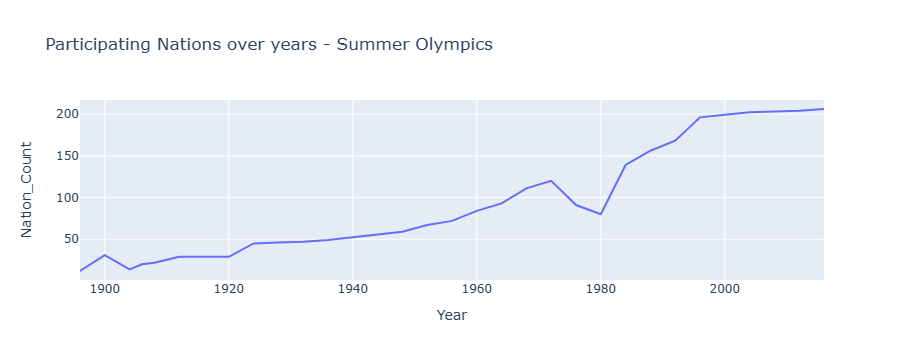

In [1455]:
fig = px.line(nations_over_time_s, y = "Nation_Count", x = "Year", title = "Participating Nations over years - Summer Olympics")
fig.show()

In [1456]:
# Participating nations over time for Winter Olympics

In [1457]:
df_winter = df_merge[df_merge["Season"]=="Winter"]
nations_over_time_w = df_winter[["Year","region"]].drop_duplicates()
nations_over_time_w

,Year,region
4,1988,Netherlands
6,1992,Netherlands
8,1994,Netherlands
10,1992,USA
14,1994,USA
...,...,...
254291,1984,Mexico
254302,1994,Mexico
254303,2010,Mexico
254305,2014,Mexico


In [1458]:
nations_over_time_w = nations_over_time_w["Year"].value_counts().reset_index()
nations_over_time_w.rename(columns={"index":"Year","Year":"Nation_Count"}, inplace=True)
nations_over_time_w =nations_over_time_w.sort_values("Year", ascending= True)
nations_over_time_w

,Year,Nation_Count
20,1924,18
19,1928,25
21,1932,17
18,1936,28
17,1948,28
15,1952,30
14,1956,32
16,1960,30
11,1964,36
12,1968,36


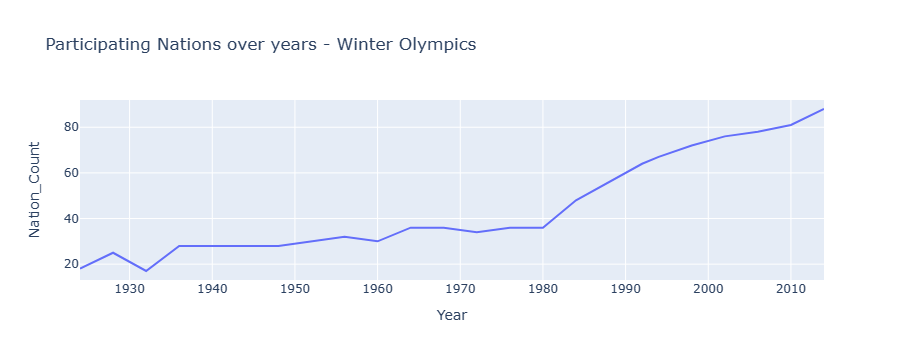

In [1459]:
fig = px.line(nations_over_time_w, y = "Nation_Count", x = "Year", title = "Participating Nations over years - Winter Olympics")
fig.show()

#### (ii).b. Number of Events that took place over time

In [1460]:
events_over_time_s = df_summer[["Year","region"]].drop_duplicates()

In [1461]:
events_over_time_s = events_over_time_s["Year"].value_counts().reset_index()
events_over_time_s.rename(columns={"index":"Year","Year":"Event_Count"}, inplace=True)
events_over_time_s =events_over_time_s.sort_values("Year", ascending= True)
events_over_time_s

,Year,Event_Count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


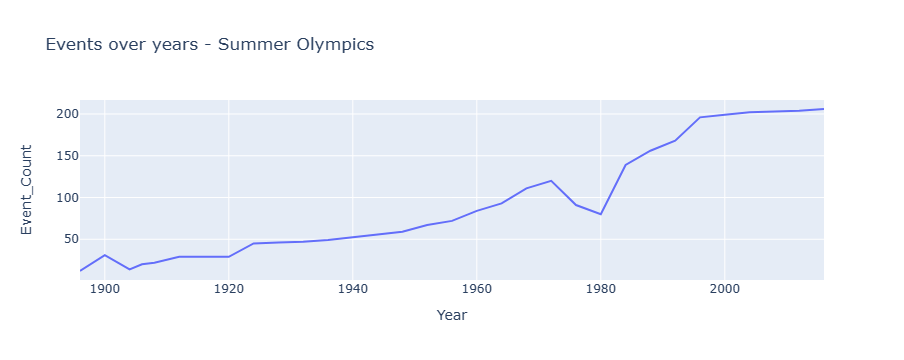

In [1462]:
fig = px.line(events_over_time_s, y = "Event_Count", x = "Year", title = "Events over years - Summer Olympics")
fig.show()

In [1463]:
df_winter = df_merge[df_merge["Season"]=="Winter"]
events_over_time_w = df_winter[["Year","region"]].drop_duplicates()



In [1464]:
events_over_time_w = events_over_time_w["Year"].value_counts().reset_index()
events_over_time_w.rename(columns={"index":"Year","Year":"Event_Count"}, inplace=True)
events_over_time_w =events_over_time_w.sort_values("Year", ascending= True)
events_over_time_w

,Year,Event_Count
20,1924,18
19,1928,25
21,1932,17
18,1936,28
17,1948,28
15,1952,30
14,1956,32
16,1960,30
11,1964,36
12,1968,36


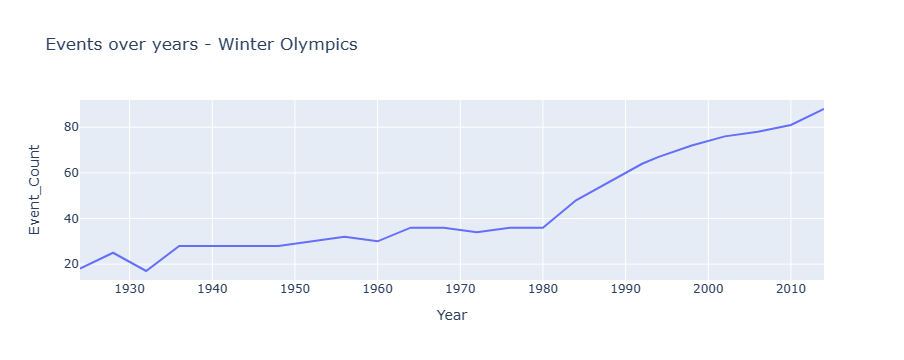

In [1465]:
fig = px.line(events_over_time_w, y = "Event_Count", x = "Year", title = "Events over years - Winter Olympics")
fig.show()

In [1466]:
# Analysis of most popular sports on basis of events taken place over time
# Summer Olympics
sportwise_events_over_time_s = df_summer.drop_duplicates(["Sport","Event", "Year"])
sportwise_events_over_time_s

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,Missing,0,0,0
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,Missing,0,0,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Missing,0,0,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,Missing,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,Missing,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194996,97860,Lonce Gaston Quentin,M,40,NaN,NaN,France,FRA,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 28 metres, Indiv...",Silver,France,Missing,0,0,1
196039,98435,Ioannis Raisis,M,23,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Fencing,"Fencing Men's Sabre, Masters, Individual",Silver,Greece,Missing,0,0,1
213142,107029,Franz Xaver Schmid,M,27,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Alpinism,Alpinism Mixed Alpinism,Gold,Germany,Missing,0,1,0
214105,107506,Hermann Schreiber,M,26,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold,Switzerland,Missing,0,1,0


In [1467]:
table = sportwise_events_over_time_s.pivot_table(index= "Sport", columns= "Year", values = "Event", aggfunc= "count").fillna(0).astype("int")

<AxesSubplot:xlabel='Year', ylabel='Sport'>

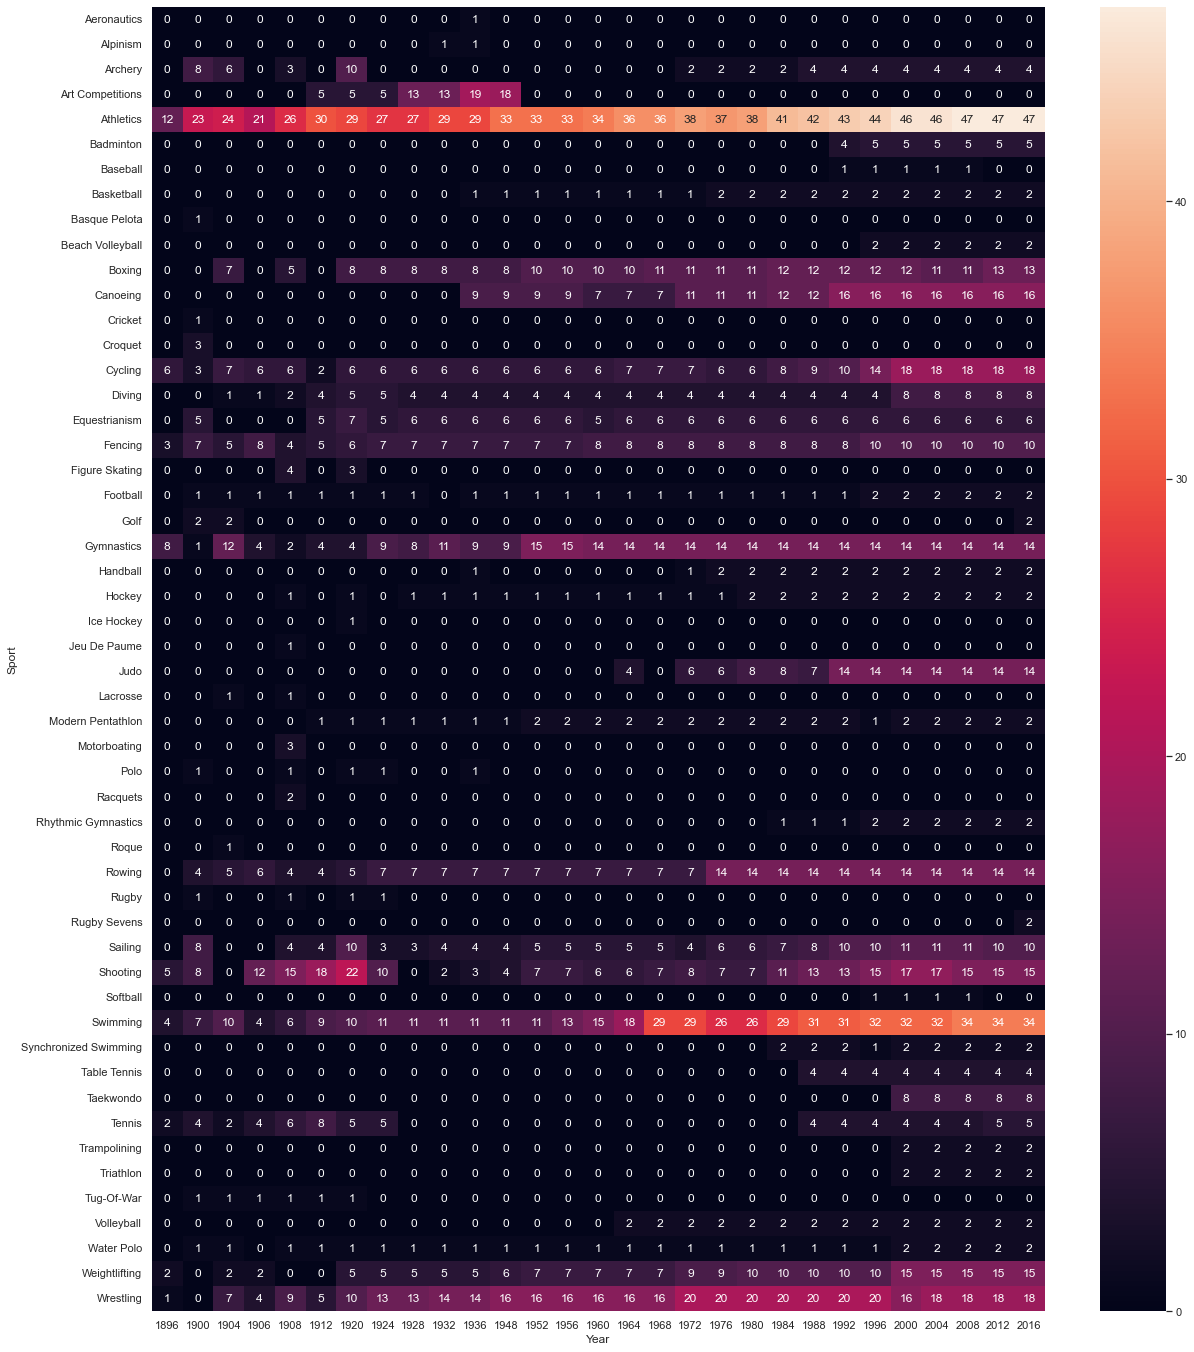

In [1468]:
plt.figure(figsize=(20,24))
sns.heatmap(table, annot = True)

In [1469]:
# Winter Olympics
sportwise_events_over_time_w = df_winter.drop_duplicates(["Sport","Event", "Year"])
sportwise_events_over_time_w

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Missing,0,0,0
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,Missing,0,0,0
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Missing,0,0,0
7,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,Missing,0,0,0
8,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Missing,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45698,23578,Britteny Cox,F,19,163.0,59.0,Australia,AUS,2014 Winter,2014,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Women's Moguls,NaN,Australia,Missing,0,0,0
46055,23771,John Robert Cress,M,25,NaN,NaN,United States,USA,1960 Winter,1960,Winter,Squaw Valley,Nordic Combined,Nordic Combined Men's Individual,NaN,USA,Missing,0,0,0
49083,25275,Arne Dankers,M,25,185.0,82.0,Canada,CAN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 10,000 metres",NaN,Canada,Missing,0,0,0
53613,27500,Elisabeth Demleitner (-Seitz),F,19,178.0,84.0,West Germany,FRG,1972 Winter,1972,Winter,Sapporo,Luge,Luge Women's Singles,NaN,Germany,Missing,0,0,0


<AxesSubplot:xlabel='Year', ylabel='Sport'>

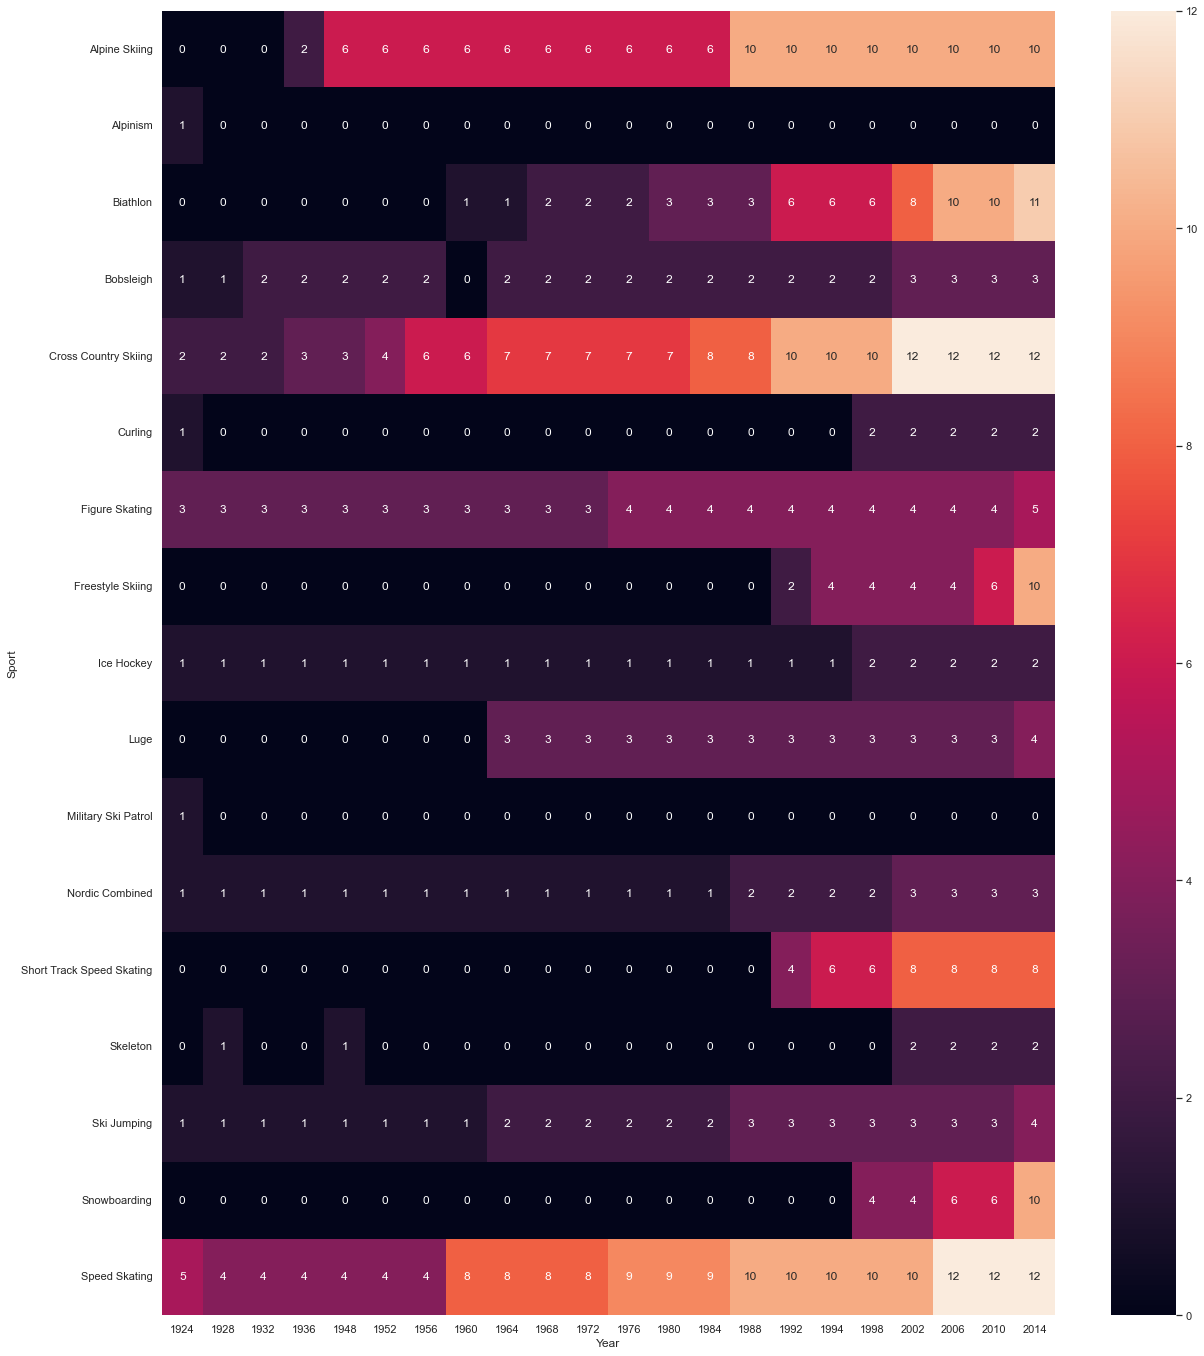

In [1470]:
table = sportwise_events_over_time_w.pivot_table(index= "Sport", columns= "Year", values = "Event", aggfunc= "count").fillna(0).astype("int")
plt.figure(figsize=(20,24))
sns.heatmap(table, annot = True)

#### c. Best athletes for each sport

In [1471]:
df_merge.shape

(269724, 20)

In [1472]:
best_athletes = df_merge.drop_duplicates(["Name", "Team", "Year", "Sport", "Event"])
best_athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,Missing,0,0,0
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,Missing,0,0,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Missing,0,0,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,Missing,0,1,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Missing,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,Missing,0,0,0
271112,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,Missing,0,0,0
271113,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,Missing,0,0,0
271114,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,Missing,0,0,0


In [1473]:
def best_athletes_sportwise(best_athletes, sport):
    # We want to drop the athletes that have never secured any medals 
    best_athletes = best_athletes.dropna(subset = ["Medal"])
    
    if sport != "Overall":
        best_athletes = best_athletes[best_athletes["Sport"] == sport]
        
    x = best_athletes.value_counts(["Name"]).reset_index().drop_duplicates(["Name"])
    x = x.rename(columns={0: "Medal Count"})

    return x

In [1474]:
best_athletes_sportwise(best_athletes, "Judo")

,Name,Medal Count
0,Ryoko Tamura-Tani,5
1,Angelo Parisi,4
2,Driulys Gonzlez Morales,4
3,David Douillet,3
4,Teddy Pierre-Marie Riner,3
...,...,...
438,Ilse Heylen (-Berghmans),1
439,Iliyan Nedkov,1
440,Igor Viktorovich Makarov,1
441,Hyeon Suk-Hui,1


#### (iii) Country-wise Analysis
a) Country wise medal tally per year  
b) Which countries are good at what sport  
c) Most successful athletes (Top 10)

##### (iii) a) Country wise medal tally per year

In [1475]:
df_summer = df_merge[df_merge["Season"] == "Summer"]
df_summer.drop_duplicates([ "Team", "Year", "Sport", "Event","NOC", "Games","City","Medal"],inplace= True)
country_medal_tally = df_summer.dropna(subset = ["Medal"])
country_medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,Missing,0,1,0
37,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,Missing,1,0,0
38,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,Missing,1,0,0
41,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,Missing,1,0,0
42,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,Missing,0,1,0


In [1476]:
country_medal_tally = country_medal_tally[country_medal_tally["region"] == "Finland"]
country_medal_tally = country_medal_tally.groupby("Year").count()["Medal"].reset_index()
country_medal_tally

,Year,Medal
0,1906,4
1,1908,5
2,1912,26
3,1920,34
4,1924,37
5,1928,25
6,1932,25
7,1936,20
8,1948,22
9,1952,22


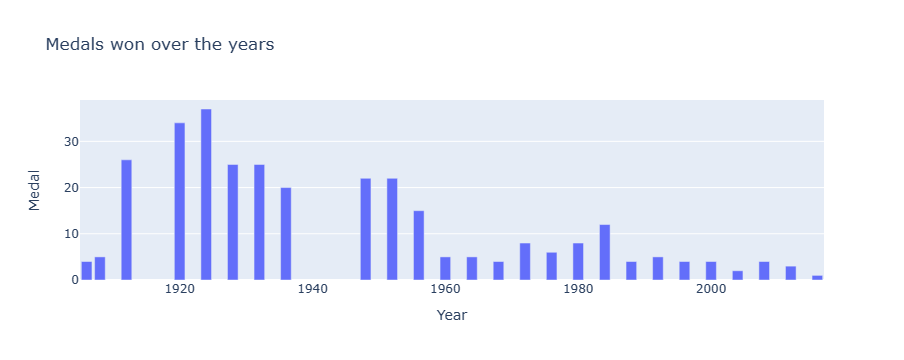

In [1477]:
fig = px.bar(country_medal_tally, y = "Medal", x = "Year", title = "Medals won over the years")
fig.show()

In [1478]:
# For creating drop down list in streamlit
country_list = df_merge["region"].unique().tolist()
country_list.sort()

##### (iii) b) Which countries are good at what sport

In [1479]:
df_summer = df_merge[df_merge["Season"] == "Summer"]
df_summer.drop_duplicates([ "Team", "Year", "Sport", "Event","NOC", "Games","City","Medal"],inplace= True)
country_medal_tally = df_summer.dropna(subset = ["Medal"])
country_medal_tally = country_medal_tally[country_medal_tally["region"] == "Finland"]


In [1480]:
table = country_medal_tally.pivot_table(index= "Sport", columns= "Year", values="Medal", aggfunc='count').fillna(0)
table

Year,1906,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,,,,,,
Archery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Art Competitions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Athletics,2.0,1.0,13.0,16.0,17.0,14.0,11.0,10.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0
Boxing,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Canoeing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Figure Skating,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gymnastics,0.0,1.0,1.0,0.0,0.0,1.0,5.0,2.0,8.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Modern Pentathlon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rowing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:xlabel='Year', ylabel='Sport'>

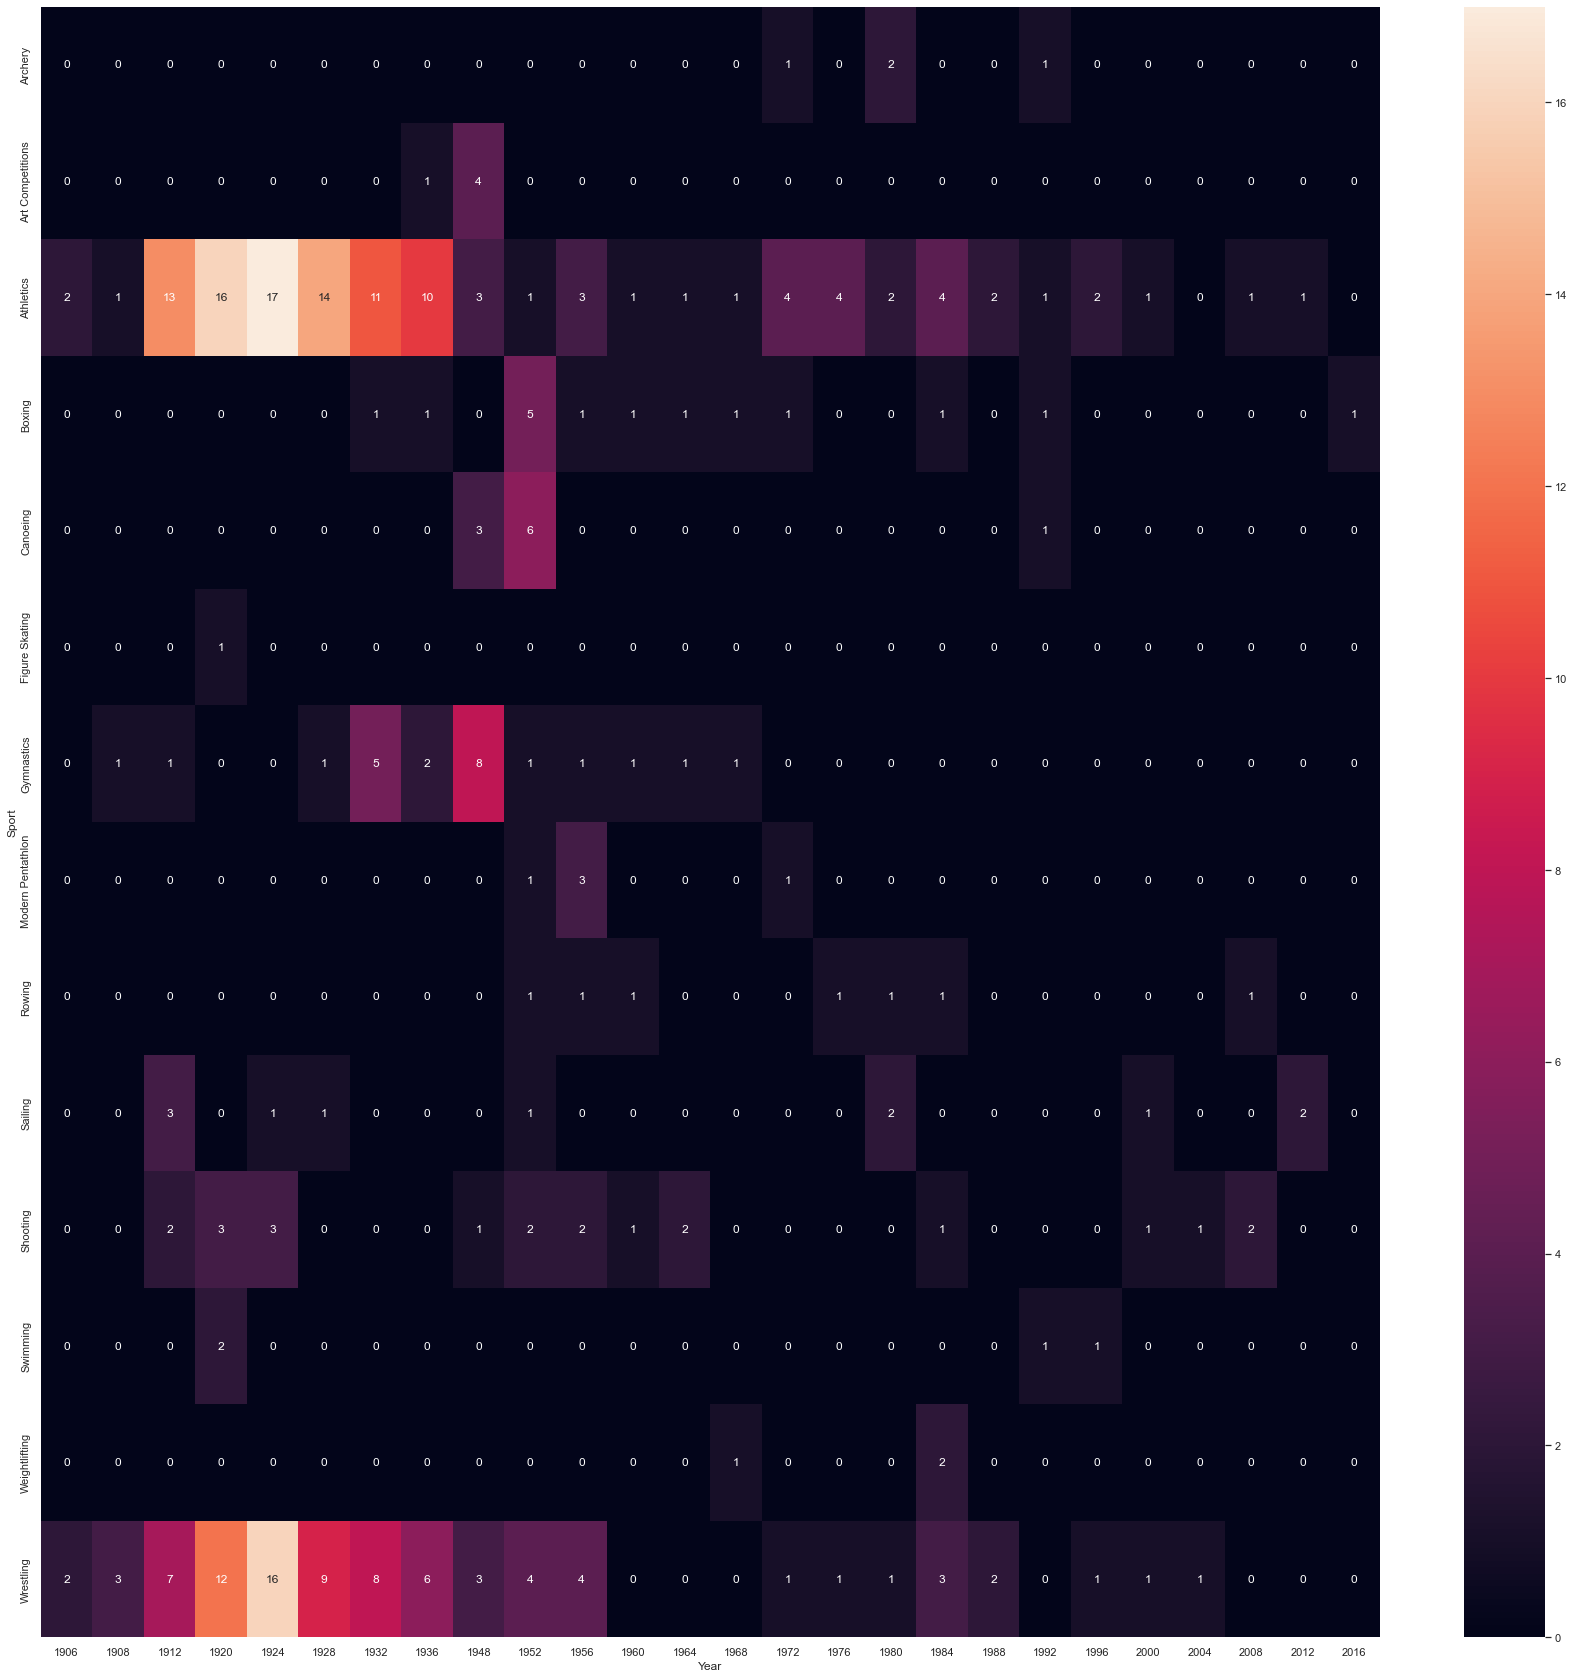

In [1481]:
plt.figure(figsize = (30,30))
sns.heatmap(table, annot=True)

##### (iii) c) Most successful athletes (Top 10)

In [1482]:
df_summer = df_merge[df_merge["Season"] == "Summer"]
top_10_athletes= df_summer.drop_duplicates(["Name", "Team", "Year", "Sport", "Event"])

In [1483]:
def top_athletes_countrywise(top_10_athletes, country):
    # We want to drop the athletes that have never secured any medals 
    top_10_athletes = top_10_athletes.dropna(subset = ["Medal"])
    

    top_10_athletes = top_10_athletes[top_10_athletes["region"] == country]
        
    x = top_10_athletes[["Name", "Sport", "region"]].value_counts(["Name"]).reset_index()
    x = x.rename(columns={0: "Medal Count"})

    return x

In [1484]:
top_athletes_countrywise(top_10_athletes, "USA")

,Name,Medal Count
0,"Michael Fred Phelps, II",28
1,Natalie Anne Coughlin (-Hall),12
2,"Dara Grace Torres (-Hoffman, -Minas)",12
3,Ryan Steven Lochte,12
4,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
...,...,...
3359,"Herbert Lawrence ""Herb"" Trube",1
3360,"Herbert Paul ""Herb"" Douglas, Jr.",1
3361,"Herbert Philip ""Bert"" Williams",1
3362,"Herbert Roger ""Herb"" Morris",1


#### (iv) Athlete-wise Analysis

##### Probability of winning medals wrt Age

In [1485]:
df_merge

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,Missing,0,0,0
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,Missing,0,0,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Missing,0,0,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,Missing,0,1,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,Missing,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,Missing,0,0,0
271112,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,Missing,0,0,0
271113,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,Missing,0,0,0
271114,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,Missing,0,0,0


In [1486]:
import plotly.figure_factory as ff

In [1487]:
df_athlete = df_merge.drop_duplicates(["Name", "region"])

In [1488]:
x1 = df_athlete["Age"]
x2 = df_athlete[df_athlete["Medal"] == "Gold"]["Age"]
x3 = df_athlete[df_athlete["Medal"] == "Silver"]["Age"]
x4 = df_athlete[df_athlete["Medal"] == "Bronze"]["Age"]

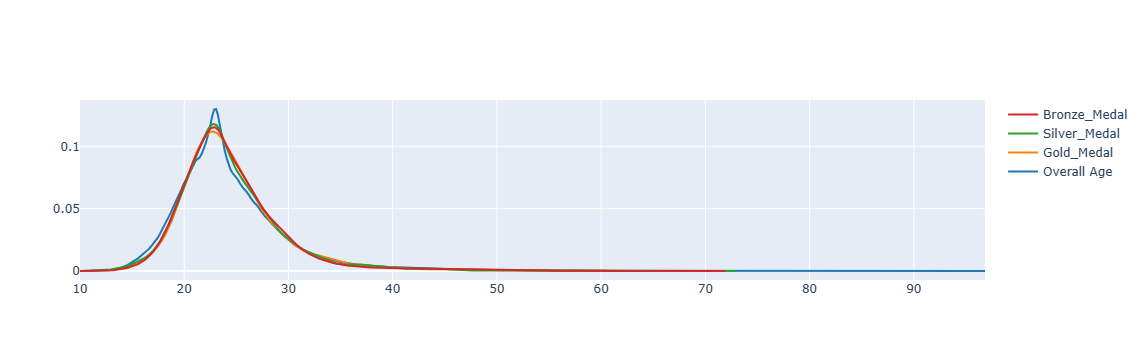

In [1489]:
fig.update_layout(autosize=False, width=1000, height=1000)
fig = ff.create_distplot([x1,x2,x3,x4],["Overall Age", "Gold_Medal", "Silver_Medal", "Bronze_Medal"], show_hist = False, show_rug = False)
fig.show()

##### Height vs Weight of Athletes in different sports

In [1497]:
df_athlete["Medal"].fillna("No medal", inplace= True)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

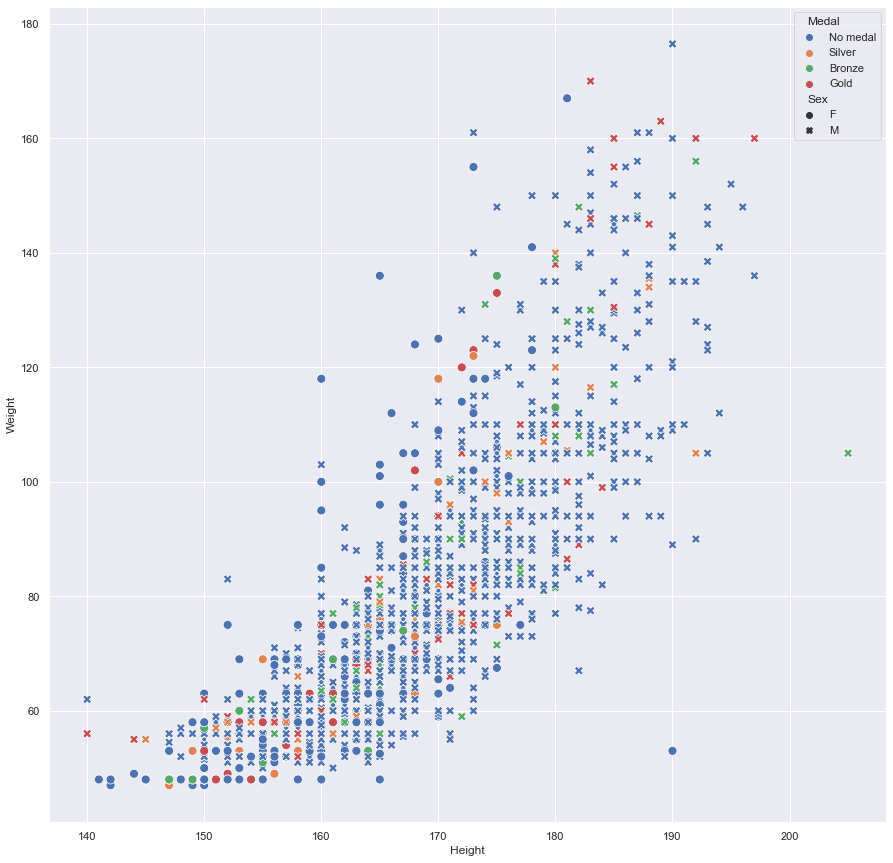

In [1522]:
plt.figure(figsize = (15,15))
x = df_athlete[df_athlete["Sport"] == "Weightlifting"]
sns.scatterplot(x["Height"], x["Weight"], hue= x["Medal"], style= x["Sex"], s = 80)